In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import pytz
import tzlocal
import h5py

import seaborn as sns

%matplotlib inline

In [2]:
PLC_df = pd.read_hdf('SC_data_test.h5', key='PLC')


In [3]:
PLC_dev_gr = PLC_df.groupby('device')

In [4]:
PLC_dev_gr.size().to_frame().rename(columns={0:'Series size'})

,Series size
device,
DPM1,698753
FT1_Flow,698753
GFM1_gN2,698753
GFM2_gAr,698753
GFM3_gH2,698753
LAr_Level,698753
LN2_Level,698753
LN2_Level_SP,698753
PT1_LDetek_Carrier,698753


In [5]:
devs_dfs = {}
for name, gr in PLC_dev_gr:
    devs_dfs[name] = gr[['value']].copy()
    devs_dfs[name].reset_index(inplace=True)

In [8]:
list(devs_dfs.keys())

['DPM1',
 'FT1_Flow',
 'GFM1_gN2',
 'GFM2_gAr',
 'GFM3_gH2',
 'LAr_Level',
 'LN2_Level',
 'LN2_Level_SP',
 'PT1_LDetek_Carrier',
 'PT2_LDetek_Sample',
 'PT3_LDetek_O2Doping',
 'PT4_Atm',
 'PT4_Atm_Corr',
 'PT5_LAr_Cryo',
 'PT5_LAr_Cryo_Corr',
 'PT6_PumpOut',
 'PT6_PumpOut_Corr',
 'PT6_PumpOut_Gauge',
 'PT7_N2_Cryo',
 'PT7_N2_Cryo_Corr',
 'PT7_N2_Cryo_SP',
 'PT8_LAr_FilterOut',
 'PT8_LAr_FilterOut_Corr',
 'P_LAr_Cryo',
 'P_LAr_CryoPC3_SP',
 'P_LAr_Cryo_SP',
 'P_LAr_FilterOut_Gauge',
 'Pump_MON',
 'Pump_SP',
 'TT1_LAr_Filter_Corr',
 'TT2_LAr_Filter_Corr',
 'TT3_LAr_Filter_Corr',
 'TT4_LAr_Filter_Corr',
 'TT5_LN2_Cryo',
 'TT5_LN2_Cryo_SP',
 'TT6_LN2_Cryo',
 'V1_LN2_Position',
 'V2_LN2_Position',
 'V3_GAr_Position']

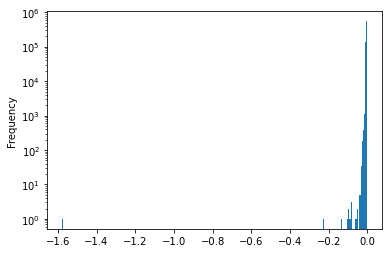

In [19]:
dt_ser = (devs_dfs['Pump_MON']['UTC'].astype(int)-devs_dfs['FT1_Flow']['UTC'].astype(int))/10**9
dt_ser.plot.hist(bins=500)

plt.yscale('log')

In [22]:
devs = ['FT1_Flow','PT6_PumpOut','PT8_LAr_FilterOut','Pump_MON']
corrs_df = dict()
for dev in devs:
    corrs_df[dev] = devs_dfs[dev]['value'].to_numpy()
corrs_df = pd.DataFrame(corrs_df)
corrs_df

,FT1_Flow,PT6_PumpOut,PT8_LAr_FilterOut,Pump_MON
0,-0.133335,0.965758,2.805719,0.000000
1,-0.682668,0.965911,2.805719,0.000000
2,-0.133335,0.965911,2.805719,0.000000
3,-0.682668,0.965453,2.805719,0.000000
4,-0.957335,0.965911,2.805719,0.000000
...,...,...,...,...
698748,-7.000000,1.684927,1.324534,54.658649
698749,-7.000000,1.685537,1.326457,54.664753
698750,-7.000000,1.678823,1.332041,54.646442
698751,-7.000000,1.686148,1.323435,54.655598


In [ ]:
sns.pairplot(corrs_df);
#sns.pairplot(corrs_df, x_vars = list(whr_df)[3:-1], y_vars=['Happiness Score'],height=3);

In [66]:
DP8_ser = PT8_df['value'] - PT8_Corr_df['value']
DP8_ser.to_frame().describe()

,value
count,698753.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [58]:
(PT6_df['UTC'] - PT6_df['UTC'][0]).astype(int)/10**9

0              0.000000
1              1.317311
2              2.634509
3              3.987279
4              5.311807
              ...      
698748    928792.565291
698749    928793.905420
698750    928795.253146
698751    928796.579396
698752    928797.931029
Name: UTC, Length: 698753, dtype: float64

<AxesSubplot:ylabel='Frequency'>

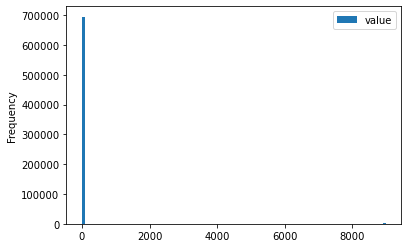

In [13]:
FT1_Flow_df.plot.hist(by='value',bins=100)

<AxesSubplot:xlabel='UTC'>

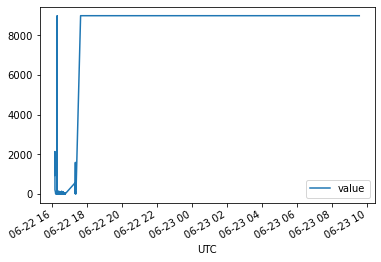

In [21]:
axs = FT1_Flow_df.plot.line(y='value')

#plt.yscale('log')

<AxesSubplot:xlabel='UTC'>

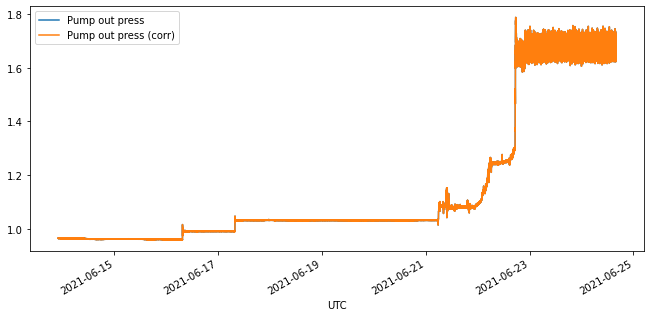

In [30]:
axs = PT6_df.plot.line(y='value', label='Pump out press', figsize=(11,5))
PT6_Corr_df.plot.line(y='value', label='Pump out press (corr)', ax=axs)
#PT8_df.plot.line(y='value', label='Filter in press', ax=axs)

In [35]:
PT6_Delta = PT6_df['value'] - PT6_Corr_df['value']
PT6_Delta.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1397506 entries, 2021-06-13 22:00:00.786912+00:00 to 2021-06-24 15:59:58.725013+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   0 non-null      float64
dtypes: float64(1)
memory usage: 21.3 MB
